<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PWM_Bipolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Pulse Width Modulation - Bipolar</h1></b>

Dr. Bingsen Wang

11/24/2023
</center>

#Python Code
The Python code illustrates the bipolar PWM in the context of H-bridge.  

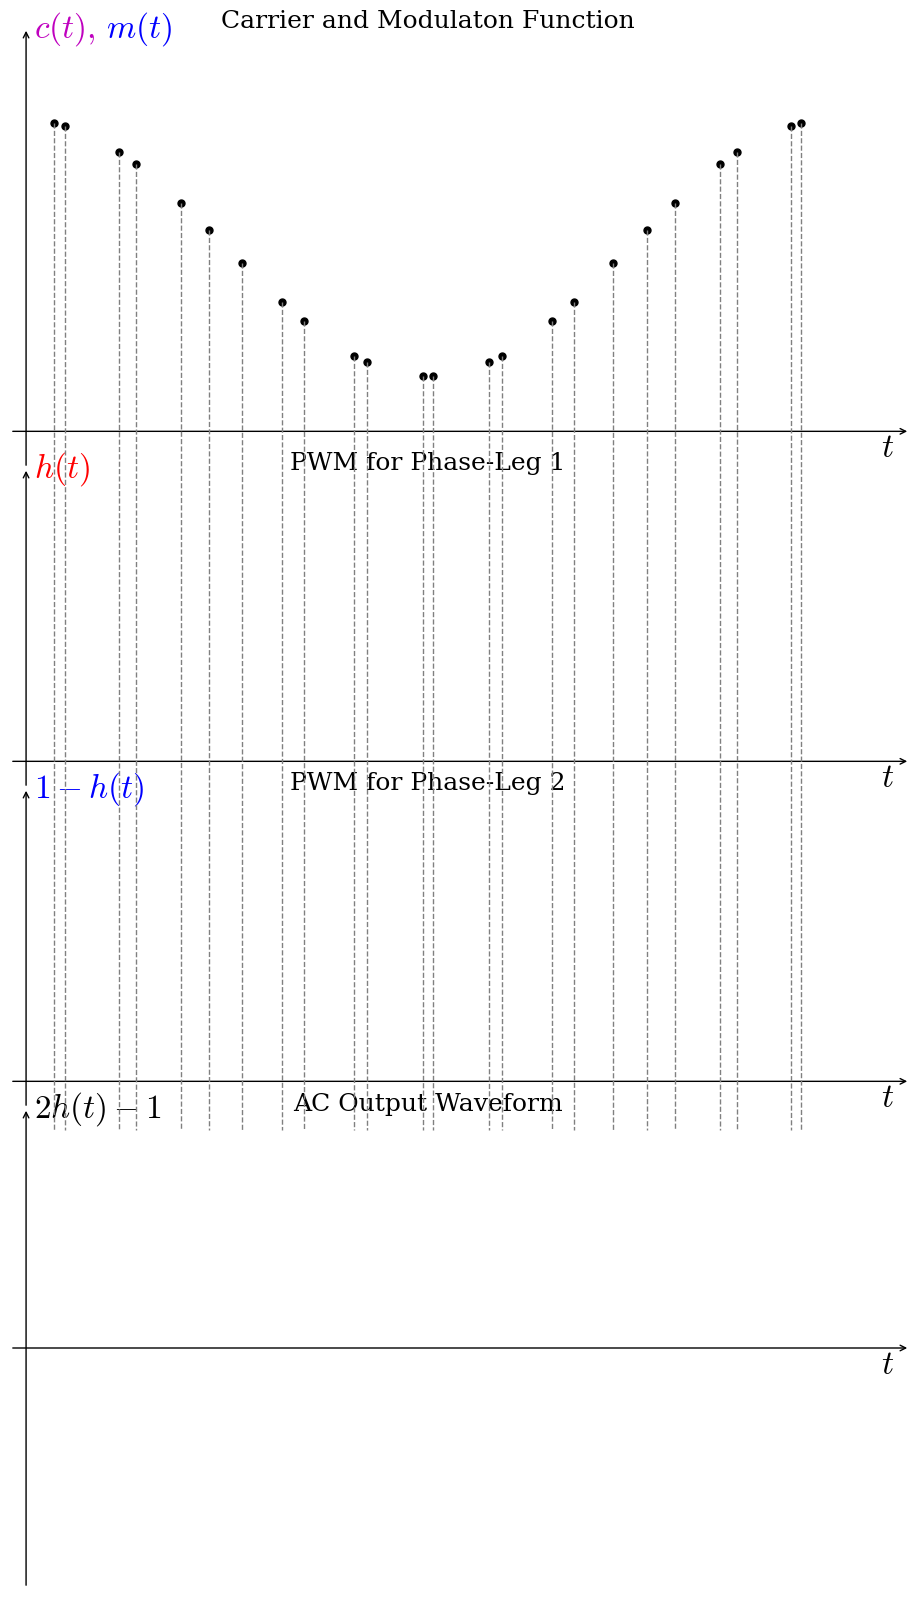

In [19]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,arccos,heaviside,array
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#functions
def carr(f,t): #carrier
  return 1/pi*arccos(cos(2*pi*f*t))

def m(MI,f,theta,t): #modulation function
  return (MI*cos(2*pi*f*t + theta) + 1)/2

def h(ct,mt): #PWM switching function
  return heaviside(mt-ct,0)

# draw dotted line between two points in two different plots
def l2Ax(fig,ax1,ax2,p1,p2):
  transFigure = fig.transFigure.inverted()
  p1_g = transFigure.transform(ax1.transData.transform(p1))
  p2_g = transFigure.transform(ax2.transData.transform(p2))
  line = matplotlib.lines.Line2D((p1_g[0],p2_g[0]),(p1_g[1],p2_g[1]),
                      transform=fig.transFigure,ls='--',color='gray', lw=1)
  fig.lines.append(line)
  return

#parameters
Nf = 2500 # number of frames
fc = 12 # carrier frequency
fm = 1 # signal
MI = 0.7 # modulation index
theta = 0

#time series
t=linspace(0,1,Nf)
ct = carr(fc,t) #carrier time-domain signal
mt = m(MI,fm,0,t) #modulation function time series
ht = h(ct,mt) #pwm signal time series

#intersection points
def y(x):
  return m(MI,fm,theta,x) -carr(fc,x)
ts=[] #list for intersection points
for k in range(fc):
  ts.append(fsolve(y,1/fc*(0.25+k))[0])
  ts.append(fsolve(y,1/fc*(0.75+k))[0])
mts = m(MI,fm,theta,array(ts)) #m(t) values at intersection points

#set up figures
fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[0, .7, 1, .275], [-.02,1.1], [-.1, 1.1]], #sine & triangle
            [[0, .5, 1, .2], [-.02,1.1], [-.1, 1.1]], # pwm - leg1
            [[0, .3, 1, .2], [-.02,1.1], [-.1, 1.1]], # pwm - leg2
            [[0, 0,  1, .3], [-.02,1.1], [-1.1,1.1]], # ac output
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$c(t),$', '$t$'],
        [r'$h(t)$', '$t$'],
        [r'$1-h(t)$', '$t$'],
        [r'$2h(t)-1$', '$t$'],
        ] #yx axes labels
title_lst = ['Carrier and Modulaton Function',
             'PWM for Phase-Leg 1',
             'PWM for Phase-Leg 2',
             'AC Output Waveform']
clst=['m','b','r','b','k'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array for all lines
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    lines.append(ax.plot([], [], clst[k], lw=1)[0]) #triangle carrier
    lines.append(ax.plot([], [], clst[k+1], lw=2)[0]) #sine reference
    lines.append(ax.plot([], [], color='k', ls='',marker='o',markersize=5)[0]) #intersection points
    y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='center',color=clst[k]) #y label
    y_text=ax.text(0.1,ym,'$m(t)$',size=24,va='center',color=clst[k+1]) # addtional ylabel
  else:
    lines.append(ax.plot([], [], clst[k+1], lw=1.5)[0]) #pwm
    y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='center',color=clst[k+1]) #y label
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label

  ax.text(0.5,ax_frame[k][2][1]+0.02,title_lst[k],va='center',ha='center',size=18)

# for k in range(len(ts)):
#   l2Ax(fig,ax_lst[0],ax_lst[3],[ts[k],mts[k]],[ts[k],1])
# animation function. This is called sequentially
def animate(i):
  k = int(t[i]*fc) # the kth carrier period
  if k==fc:
    return
  if (t[i] - ts[2*k]>=0) and (t[i-1] - ts[2*k]<=0):
    l2Ax(fig,ax_lst[0],ax_lst[3],[ts[2*k],mts[2*k]],[ts[2*k],1])
    lines[2].set_data(ts[:2*k+1], mts[:2*k+1])
  if (t[i] - ts[2*k+1]>=0) and (t[i-1] - ts[2*k+1]<=0):
    l2Ax(fig,ax_lst[0],ax_lst[3],[ts[2*k+1],mts[2*k+1]],[ts[2*k+1],1])
    lines[2].set_data(ts[:2*k+2], mts[:2*k+2]) #intersetion points
  lines[0].set_data(t[:i+1],ct[:i+1])
  lines[1].set_data(t[:i+1],mt[:i+1])
  lines[3].set_data(t[:i+1],ht[:i+1]) #leg1
  lines[4].set_data(t[:i+1],1-ht[:i+1]) #leg2
  lines[5].set_data(t[:i+1],2*ht[:i+1]-1) #ac output
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"PWM_bipolar.mp4"
writervideo = animation.FFMpegWriter(fps=100)
anim.save(fn, writer=writervideo,dpi = 120)